导入所需要的库

In [1]:
import numpy as np
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt

生成训练数据，并可视化数据分布情况

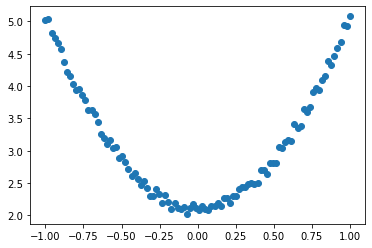

In [2]:
#设定随机种子，注意以下t都是torch
t.manual_seed(100)


#设定生成的类型为float类型
dtype = t.float

#生成x坐标数据，x为tenor，形状为100x1
x=t.unsqueeze(t.linspace(-1,1,100),dim=1)


#生成y坐标数据，y为tenor，形状为100x1，另加上一些噪音
#y=3*x^2+2+0.2*(和x形状相同的标准正太分布)
y = 3*x.pow(2)+2+0.2 * t.rand(x.size())

#画图scatter绘制散点图，默认用蓝色的'o'来绘制
plt.scatter(x,y)

#显示图
plt.show()



初始化权重参数（并设定记录梯度模式为True）

In [3]:
w = t.randn(1,1, dtype=None,requires_grad=True)
b = t.zeros(1,1,dtype=None,requires_grad=True)

In [4]:
lr=0.01

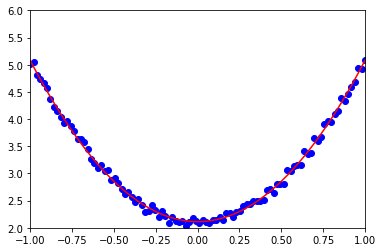

tensor([[2.9665]], requires_grad=True) tensor([[2.1139]], requires_grad=True)


In [5]:
for i in range(100): 
    y_pred=x.pow(2)*w+b
    loss= 0.5*((y_pred-y)**2)
    loss=loss.sum()
    loss.backward()
    # 手动更新参数，需要用torch.no_grad()更新参数。若不使用torch.no_grad()在循环中梯度会叠加
    with t.no_grad():
        w-=lr*w.grad
        b-=lr*b.grad
        # 梯度清零相当于
        w.grad.zero_()
        b.grad.zero_()



#scatter绘制散点，plot绘制经过点的曲线
#tensor.detach()返回一个新的tensor，从当前计算图中分离下来。但是仍指向原变量的存放位置，
#不同之处只是requirse_grad为false.得到的这个tensir永远不需要计算器梯度，不具有grad.
#下面可以不将tensor转化成numpy也能画图
plt.plot(x.numpy(), y_pred.detach().numpy(),'r-',label='predict')#predict
plt.scatter(x.numpy(), y.numpy(),color='blue',marker='o',label='true') # true data

#设定横纵坐标区间
plt.xlim(-1,1)
plt.ylim(2,6)  

#显示图
plt.show()
        
print(w, b)


注意：（1）plt.plot(x,y_pred.detach(),'r--',label='predict')必须把y_pred从求梯度运算中分离才能画图
    （2）w.grad.zero_()下划线在末尾
    （3）y_pred=x.pow(2).mm(w)+b
    (4)t.manual_seed(100)
    (5)t.linspace()
    (6)t.unsqueeze()
   (7) x.pow(2).mm(w):w必须是一个张量才行
   (8)x.size()别忘记括号
   (9)b.grad记住没括号